In [1]:
%pip install jupyter pandas sympy
%pip install beautifulsoup4 lxml html5lib
%pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 3.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with consistent data for fish and bacteria populations
data = pd.DataFrame({
    'Year': range(2010, 2021),
    'Fish Population': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000],
    'Bacteria Population': [5000, 5200, 5300, 5500, 5800, 6000, 6200, 6400, 6600, 7000, 7200],
    'Temperature (Celsius)': [25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 31],
    'pH Level': [7.2, 7.3, 7.4, 7.2, 7.5, 7.6, 7.2, 7.4, 7.3, 7.5, 7.4],
    'Dissolved Oxygen (mg/L)': [8, 7.5, 8.2, 8.1, 8.5, 7.9, 8.3, 8, 7.8, 8.6, 8.2]
})

# Convert the DataFrame to an HTML table
html_table = data.to_html(classes='table table-bordered table-striped', index=False, escape=False)

# Save the HTML table to a file (optional)
with open('data_table.html', 'w') as file:
    file.write(html_table)

In [3]:
from pandas import read_html

In [4]:
filename = 'data_table.html'
tables = read_html(filename,
                   header=0,
                   index_col=0,
                   decimal='M')

In [17]:
df = tables[0]

In [18]:
print(df.head())

      Fish Population  Bacteria Population  Temperature (Celsius)  pH Level  \
Year                                                                          
2010             1000                 5000                     25       7.2   
2011             1100                 5200                     26       7.3   
2012             1200                 5300                     26       7.4   
2013             1300                 5500                     27       7.2   
2014             1400                 5800                     27       7.5   

      Dissolved Oxygen (mg/L)  
Year                           
2010                      8.0  
2011                      7.5  
2012                      8.2  
2013                      8.1  
2014                      8.5  


In [5]:
import numpy as np
import matplotlib.pyplot as pl

In [6]:
# Function for quadratic growth model
def growth_func_quad(t, pop, alpha, beta):
    return alpha * pop + beta * pop**2

In [7]:
# Function to run the simulation
def run_simulation(t_0, p_0, t_end, alpha, beta, growth_func):
    results = []
    results.append(p_0)

    for t in range(t_0, t_end):
        results.append(results[-1] + growth_func(t, results[-1], alpha, beta))

    return results

In [8]:
# Create time values
t_0 = 0
t_end = 50
time_values = np.arange(t_0, t_end + 1)

In [9]:
# Parameters for fish population
alpha_fish = 10 / 1000
beta_fish = -0.5 / 1000
p_0_fish = 100

results_fish = run_simulation(t_0, p_0_fish, t_end, alpha_fish, beta_fish, growth_func_quad)


In [10]:
# Parameters for bacteria population
alpha_bacteria = 5 / 1000
beta_bacteria = -0.2 / 1000
p_0_bacteria = 10

results_bacteria = run_simulation(t_0, p_0_bacteria, t_end, alpha_bacteria, beta_bacteria, growth_func_quad)


In [11]:
# Create subplots
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0, 0.5, 'Population')

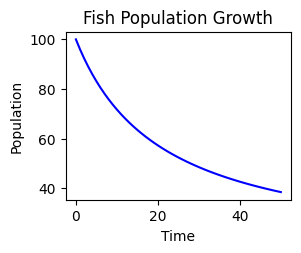

In [12]:
plt.subplot(2, 2, 1)
plt.plot(time_values, results_fish, color='blue', label='Fish model')
plt.title('Fish Population Growth')
plt.xlabel('Time')
plt.ylabel('Population')

(0.0, 10.0)

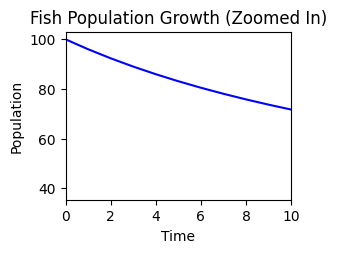

In [13]:
plt.subplot(2, 2, 2)
plt.plot(time_values, results_fish, color='blue', label='Fish model')
plt.title('Fish Population Growth (Zoomed In)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.xlim(0, 10)

Text(0, 0.5, 'Population')

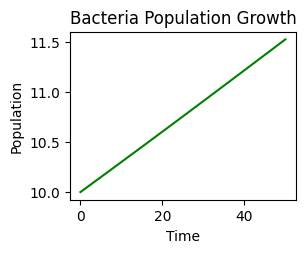

In [14]:
plt.subplot(2, 2, 3)
plt.plot(time_values, results_bacteria, color='green', label='Bacteria model')
plt.title('Bacteria Population Growth')
plt.xlabel('Time')
plt.ylabel('Population')

(0.0, 10.0)

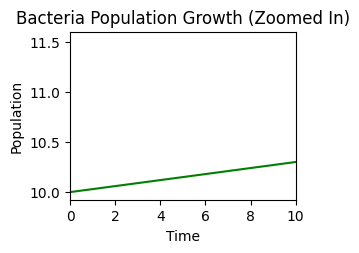

In [15]:
plt.subplot(2, 2, 4)
plt.plot(time_values, results_bacteria, color='green', label='Bacteria model')
plt.title('Bacteria Population Growth (Zoomed In)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.xlim(0, 10)

In [16]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>